##### Problem 1: Read in the Sacramento housing data set.

In [1]:
import pandas as pd

shd = pd.read_csv('data/sacramento_real_estate_transactions.csv')

shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


##### Problem 2: Conduct exploratory data analysis on this data set. Report any notable findings here and any steps you take to clean/process data.

Hint: These EDA checks will be on every data set we give you. If checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [8]:
shd.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [13]:
# Zip code is better as ano object so I will have to convert it.
shd['zip'] = shd['zip'].astype(str)

In [23]:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


Looks like we have some bad values being that there are houses with 0 bedrooms, 0 baths, a negative sqr footage and a negative price.  As well as a house that is in Antartica.  

In [24]:
# Whats the deal with the houses that have 0 bedrooms?
shd[shd['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


Given the large value of houses that have 0 beds, 0 baths and 0 square feet I am going to make an assumption that thesea re plots of land that have yet to have anything built on them.
As a result I will not be dropping them.

In [25]:
# what about those houses that are less than 0 dollars?
shd[shd['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [28]:
# And the negative square feet?
shd[shd['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


Looks like the house with a negative price is also the one with a negative squarefeet.
It is time to make a choice.  Assume that the data was entered improperly and is meant to be possitive or drop the data.

Side note, the state is actually labeled wrong as well.

In [29]:
# Let me check if any other values are also not labeled right.
shd[shd['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [31]:
#Looks like it is just one row, so I am going to drop it.

shd.drop(703, inplace = True)

##### Problem 3: Our goal will be to predict price. List the variables that qualify as available predictors in a SLR model. For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.

Id say we can use 'beds','baths','sq__ft'

Maybe 'latitude' & 'longitude'.  ( more so if we're using classifiers)

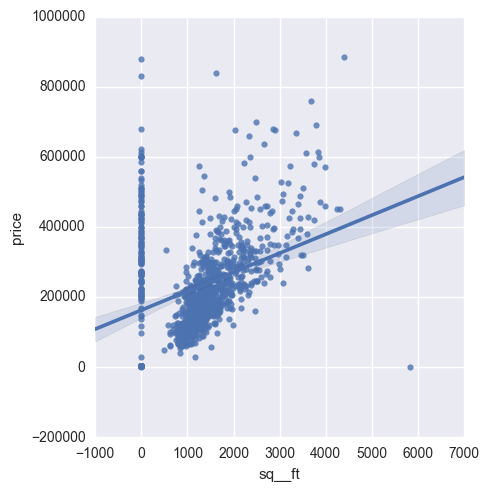

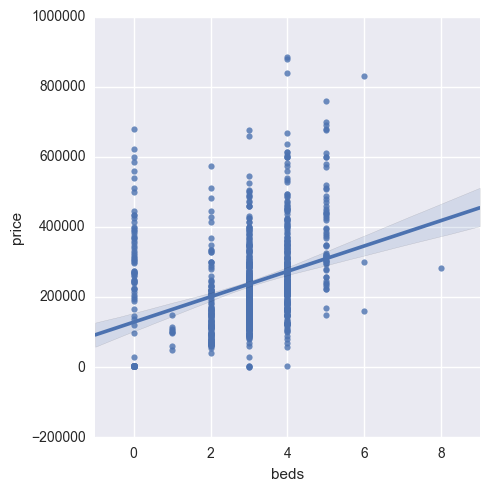

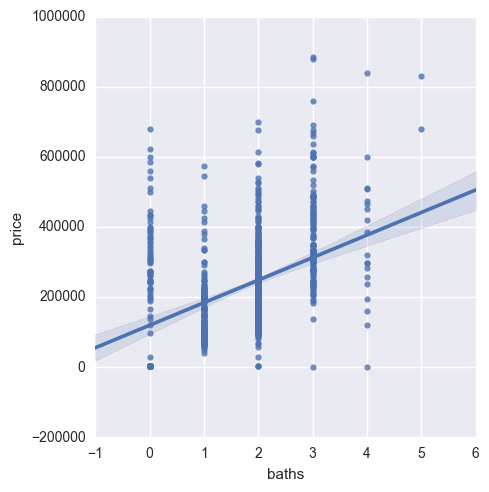

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.lmplot(x = 'sq__ft', y = 'price', data = shd )
plt.show()
sns.lmplot(x = 'beds', y = 'price', data = shd )
plt.show()
sns.lmplot(x = 'baths', y = 'price', data = shd )
plt.show()

In [45]:
shd.to_csv('data/sacramento_real_estate_transactions_Clean.csv')

##### Problem 4: Which independent variable would be the best predictor of Y in a SLR model? Why?

It looks like Square Footage is a better predictor than Beds or Baths.
Beds and Baths are descrete measures as opposed to Square feet which are continuous.  Additionally there is probably some strong coorelations between them in that houses with biggger square feet will have more beds and more baths.

If we dropped all the plots of land that are in the dataset (those with 0 sq ft, beds & baths)  we would see a much stronger trend line in our lm plot.

##### Problem 5: Build a function that will take in lists Y and X and returns the estimates that minimize SSE. Test your function on price and the variable you determined was best in Problem 4. Report the slope and Y-intercept.

In [74]:
# Gets the optimal Slope an y intercept

def lin_reg(x,y):
    # Necessary Imports so this can work as a standalone
    import numpy as np
    import scipy.stats
    
    # Using other libraries for standard Deviation and Pearson Correlation Coef.
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    # Pearson Co. Coef returns a tuple so it needs to be sliced/indexed
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    #Print the Optimal Values
    print 'The Optimal Y Intercept is ', beta_0
    print 'The Optimal slope is ', beta_1

In [75]:
lin_reg(x,y)

The Optimal Y Intercept is  0.204918032787
The Optimal slope is  0.450819672131


In [76]:
lin_reg(shd['sq__ft'],shd['price'])

The Optimal Y Intercept is  162938.737561
The Optimal slope is  54.156197523


##### Problem 6: Interpret the Y-intercept. Does it make sense to interpret the Y-intercept here?

The Y Intercept should be the relative y value that our data starts around in that from this point out as x increase so should the y value from this point.

##### Problem 7: Give an example of how this model could be used for prediction and how this model could be used for inference. Be sure to make it clear which example is associated with prediction and which is associated with inference.

Either a new home is built in the area or on is going on the market that was not previosly listed.  The individual(s) that own the home do not know the true value of the home and do not want to sell through a realty group for 'reasons'.  Using the data provide as their train data they can build a linear regression model and input their homes characteristics as the test data and get a relative price to base their listing off of.

##### Bonus: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [77]:
#predictor: y = 162938.74 + 54.16x
# Creating a list of predicted values
y_pred = []

for x in shd['sq__ft']:
    y = 162938.74 + (54.16*x)
    y_pred.append(y)


In [79]:
# Appending the predicted values to the Sacramento housing dataframe to do DF calcs
shd['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred
shd['Residuals'] = shd['price']-shd['Pred']

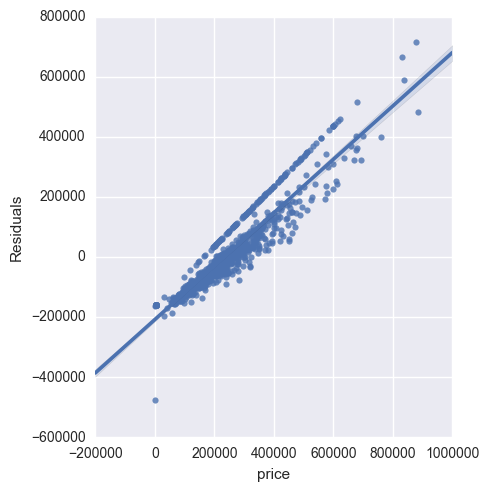

In [80]:
#Plotting the residual Differences againts price.
import seaborn as sns
%matplotlib inline
sns.lmplot(x= 'price', y = 'Residuals', data = shd)

In [ ]:
#It is a bloody correlated line.  Anyone have a guess as to what may have occured this?

In [81]:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude,Pred,Residuals
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,2.913618,1.777439,1315.253049,234167.841463,38.607670,-121.355832,234172.845122,-5.003659
std,1.307175,0.895484,853.416702,138434.220875,0.145494,0.138268,46221.048576,130491.180397
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704,162938.740000,-476258.260000
25%,2.000000,1.000000,951.500000,145000.000000,38.482714,-121.446121,214471.980000,-86755.920000
50%,3.000000,2.000000,1304.000000,214375.000000,38.626257,-121.376009,233563.380000,-29275.900000
75%,4.000000,2.000000,1718.500000,300000.000000,38.695611,-121.295557,256012.700000,49839.660000
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599,478258.260000,716061.260000
